In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs

import matplotlib
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

colors = ['#f25c9d', '#F2A25C', '#5B98A6', '#8BB63C']
path = 'e:/_phd/Docking_score/VDR/Data/'

RDKit WARNING: [20:39:02] Enabling RDKit 2019.09.3 jupyter extensions


In [40]:
df_adock1 = pd.read_csv(path + 'results_1DB1.csv')
df_adock2 = pd.read_csv(path + 'results_3KPZ.csv')
df_adock = pd.concat([df_adock1, df_adock2], axis=1, sort=True)
df_adock

id  aff_1DB1            id  aff_3KPZ
0        C00104670      -9.1     C00104670      -9.4
1        C00125193      -6.1     C00125193      -6.4
2        C00125195      -7.0     C00125195      -7.0
3        C00231968      -8.5     C00231968      -8.7
4        C00296648      -9.1     C00296648      -9.6
...            ...       ...           ...       ...
2028  CHEMBL466792     -13.2  CHEMBL466792     -13.3
2029  CHEMBL467212     -14.1  CHEMBL467212     -14.2
2030  CHEMBL468167      -6.1  CHEMBL468167      -6.2
2031  CHEMBL494338     -11.9  CHEMBL494338     -12.0
2032   CHEMBL51314      -9.9   CHEMBL51314     -10.0

[2033 rows x 4 columns]

In [ ]:
a = df_merged.id.str[:3]
df_merged['label'] =  np.where(a == 'CHE', 1, 0)

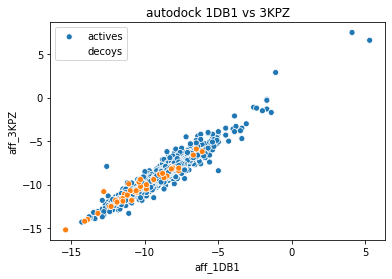

In [75]:
plot = sns.scatterplot(df_adock.aff_1DB1,df_adock.aff_3KPZ, hue=df_merged.label).set_title('autodock 1DB1 vs 3KPZ')
plt.legend(['actives', 'decoys'])
plt.show()

In [37]:
file = 'VDR_actives_decoys_ds_1DB1_3KPZ.csv'
df = pd.read_csv(path + file)
df = df.sort_values(['id'])
cols = df.columns
names_1DB1 = ['ds_CHEMPLP_1DB1', 'ds_london_1DB1', 'ds_ASE_1DB1', 'ds_AHB_1DB1', 'ds_AdG_1DB1']
names_3KPZ = ['ds_CHEMPLP_3KPZ', 'ds_london_3KPZ', 'ds_ASE_3KPZ', 'ds_AHB_3KPZ', 'ds_AdG_3KPZ']

In [70]:
df_merged = pd.merge(df, df_adock1, on="id")
a = df_merged.id.str[:3]
df_merged['label'] =  np.where(a == 'CHE', 1, 0)
len(a), df_merged.shape

(2033, (2033, 14))

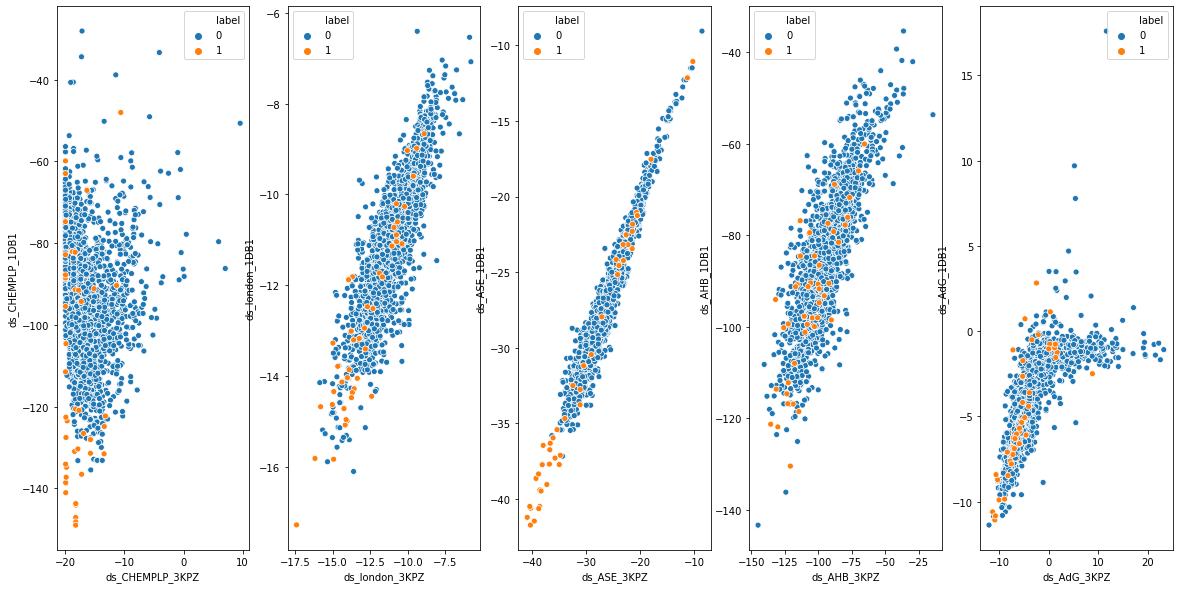

In [71]:
fig, axs = plt.subplots(ncols=5,figsize=(20, 10))

plt.subplots_adjust(wspace = 0.2)
for i in range(5):
    sns.scatterplot(x=df_merged[names_3KPZ[i]], y=df_merged[names_1DB1[i]], 
                    ax=axs[i], hue=df_merged['label'])

In [50]:
file = 'VDR_ch25_curated_DW_2.csv'
df_info = pd.read_csv(path + file)
df_info

smiles             id  \
0    CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2\C(=C\C=C/3\C[C...     CHEMBL1042   
1    COc1cc(\C=C\C(=C\C(=O)\C=C\c2ccc(O)c(OC)c2)\O)...   CHEMBL116438   
2    CC(C)c1onc(c1COc2ccc(N(C)Cc3ccc(cc3)C(=O)O)c(n...  CHEMBL1209109   
3    CN(Cc1cccc(c1)C(=O)O)c2ccc(OCc3c(onc3c4c(Cl)cc...  CHEMBL1209170   
4    CN(Cc1ccc(cc1)C(=O)O)c2ccc(OCc3c(onc3c4c(Cl)cc...  CHEMBL1209173   
..                                                 ...            ...   
237                     CN(C)c1ccc(cc1)\N=C\c2oc(C)cc2  CHEMBL1978564   
238                          CC1=CC(=O)c2c(O)cccc2C1=O   CHEMBL295316   
239                    FC(F)(F)Oc1ccc(NN=C(C#N)C#N)cc1   CHEMBL457504   
240                     Clc1c(Cl)c(C#N)c(Cl)c(C#N)c1Cl   CHEMBL468167   
241       CC(C)(C)C(=O)Nc1ccc2c(c1)C(=O)C(=O)c3ccccc23    CHEMBL51314   

      potency     pec50  category  
0        0.21  9.677781    active  
1    20000.00  4.698970  inactive  
2    10000.00  5.000000  inactive  
3    10000.00  5.000000  inactive  
4    10000.00  5.000000  inactive  
..        ...       ...       ...  
237   1000.00  6.000000    active  
238    891.30  6.049976    active  
239    891.30  6.049976    active  
240    794.30  6.100015    active  
241   1000.00  6.000000    active  

[242 rows x 5 columns]

In [57]:
df_actives = pd.merge(df_info, df, on="id")
df_actives.shape

(44, 16)

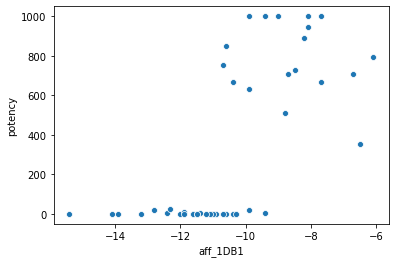

In [56]:
sns.scatterplot(df_actives.aff_1DB1, df_actives.potency)

In [53]:
df_actives

smiles             id  \
0   CCC(CC)(c1ccc(OC[C@H](O)C(C)(C)C)c(C)c1)c2ccc(...  CHEMBL1834893   
1   CCOC(=O)\C=C\C1(CC1)[C@H](O)\C=C\[C@@H](C)[C@H...  CHEMBL2112315   
2   CC\C(=C/C=C/C(O)(C(F)(F)F)C(F)(F)F)\c1cccc(CCc...  CHEMBL2171447   
3   CC\C(=C/C=C/C(O)(C(F)(F)F)C(F)(F)F)\c1cccc(OCc...  CHEMBL2171448   
4   CCCc1cc(ccc1c2cc(OCc3ccc(CO)c(CO)c3)ccc2CC)C(O...  CHEMBL2171449   
5   CCCc1cc(ccc1c2cc(CCc3ccc(CO)c(CO)c3)ccc2C)C(O)...  CHEMBL2171450   
6   CC[C@H](CCC(C)(C)O)[C@H](C)[C@H]1CCC2\C(=C\C=C...   CHEMBL222195   
7   C[C@@H](CCCC(C)(C)O)C1CCC2\C(=C\C=C3C[C@@H](O)...   CHEMBL226380   
8   C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407821   
9   C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407822   
10  C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407823   
11  C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407824   
12  C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407825   
13  C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(=C\C=C/3\C...  CHEMBL2407826   
14  C[C@H](CC#C[C@@H](O)C12CC3CC(CC(C3)C1)C2)[C@H]...  CHEMBL3263871   
15  C[C@H](CC#C[C@H](O)CC12CC3CC(CC(C3)C1)C2)[C@H]...  CHEMBL3263872   
16  C[C@]12CCC\C(=C/C=C3C[C@@H](O)C(=C)[C@H](O)C3)...  CHEMBL3745849   
17  CCn1c(ccc1C(CC)(CC)c2ccc(OCC(O)C(C)(C)C)c(C)c2...  CHEMBL3746013   
18  CCOc1ccc(NC(=O)c2ccc(n2CC)C(CC)(CC)c3ccc(OCC(O...  CHEMBL3747395   
19  CC[C@@H](C)[C@H](NC(=O)c1ccc(n1CC)C(CC)(CC)c2c...  CHEMBL3747703   
20  C[C@]12CCC\C(=C/C=C3C[C@@H](O)C(=C)[C@H](O)C3)...  CHEMBL3747761   
21                    COc1cccc(c1)C2=Nc3ccccc3C(=S)N2  CHEMBL3823873   
22  C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2[C@@H]3CCc4cc...  CHEMBL4080769   
23  C[C@@H](C[C@H]1CC(=C)C(=O)O1)[C@H]2CC[C@H]3\C(...   CHEMBL409470   
24  CCN(CC)CCNC(=O)c1cc(cn1CC)C(CC)(CC)c2ccc(C#CC(...  CHEMBL4105311   
25  C[C@@H](\C=C\C[C@@H](O)CC12CC3CC(CC(C3)C1)C2)[...   CHEMBL452878   
26  C[C@@H](\C=C\C[C@@H](O)C12CC3CC(CC(C3)C1)C2)[C...   CHEMBL466792   
27  C[C@H](\C=C\[C@@H](O)C12CC3CC(CC(C3)C1)C2)[C@H...   CHEMBL467212   
28  CC(C)(O)CCCC1(CC1)C2=CC[C@H]3\C(=C\C=C/4\C[C@@...   CHEMBL494338   
29             COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2  CHEMBL1356393   
30  COc1ccc(C[S+]([O-])\C(=C(\Cl)/C(=O)Nc2ccc(OC)n...  CHEMBL1377737   
31  O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...  CHEMBL1389315   
32             CCCNC(=O)c1nnsc1[S+]([O-])c2ccc(Cl)cc2  CHEMBL1409883   
33       CCOC(=O)C1=C(Cc2ccc(OC)cc2)C(=O)c3ccccc3C1=O  CHEMBL1484163   
34               O=C1C(=O)c2ccc(cc2c3ccccc13)c4ccccc4  CHEMBL1498509   
35              OC1=C(C(=O)c2ccccc12)C3=Nc4ccccc4C3=O  CHEMBL1498652   
36               OC1(NC(=O)c2ccccc2)C(=O)c3ccccc3C1=O  CHEMBL1501990   
37  NC(=O)c1ccc(cc1)N=C2C(=O)Nc3ccc(cc23)[N+](=O)[O-]  CHEMBL1504661   
38        [O-][N+](=O)c1oc(cc1)C(=O)\C=C\c2ccc(Cl)cc2  CHEMBL1514238   
39                     ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl   CHEMBL192627   
40                     CN(C)c1ccc(cc1)\N=C\c2oc(C)cc2  CHEMBL1978564   
41                          CC1=CC(=O)c2c(O)cccc2C1=O   CHEMBL295316   
42                     Clc1c(Cl)c(C#N)c(Cl)c(C#N)c1Cl   CHEMBL468167   
43       CC(C)(C)C(=O)Nc1ccc2c(c1)C(=O)C(=O)c3ccccc23    CHEMBL51314   

        potency      pec50 category  aff_1DB1  
0      0.060000  10.221849   active     -10.3  
1      0.350000   9.455932   active     -10.9  
2      2.250000   8.661197   active     -11.6  
3      5.000000   8.301030   active     -11.4  
4      2.200000   8.657577   active     -10.6  
5      0.500000   9.301030   active     -11.6  
6      0.002000  11.698970   active     -10.7  
7      0.070000  10.154902   active     -11.5  
8      0.010000  11.000000   active     -11.5  
9      0.290000   9.537602   active     -11.0  
10     0.150000   9.823909   active     -10.4  
11     0.044000  10.356547   active     -10.3  
12     0.210000   9.677781   active     -11.1  
13     0.680000   9.167491   active     -12.0  
14     0.614000   9.379926   active     -13.9  
15     3.280000   8.540171   active   

In [92]:
df1 = pd.read_csv(path + "VDR_VDRML_ECR_plus_docking_results_plus_rank_1DB1_3KPZ.csv")
df2 = pd.read_csv(path + "VDR_actives_decoys_ECR_plus_docking_results_plus_rank_1DB1_3KPZ.csv")
df = pd.concat([df1, df2])
names = df.columns[2:].to_list()
names = ['id', 'smi', 'label', 'active'] + names

df = df.rename(columns={'smiles': 'smi'})
#df['log10_1PQ6'] = (np.log10(df.ECR_1PQ6))
#df['log10_1P8D'] = (np.log10(df.ECR_1P8D))  

a = df.id.str[:3]
df['label'] =  np.where(a == 'VDR', 1, np.where(a == 'CHE', 2, 3))
x = (df.ECR_3KPZ!=0.0).to_list()
y = (df.ECR_1DB1!=0.0).to_list()

df['active'] =  x and y

df = df[names]
#df = df[df.ECR_3KPZ!=0.0]
df.head()

id                                                smi  label  \
0   VDRML1546  O(CC(O)C(C)(C)C)c1ccc(cc1C)C(CC)(CC)c1ccc(NC(=...      1   
1  VDRML15305  OC1CC(CC(O)C1=O)=CC=C1C2CCC(C(CCCC(C(OC)=O)=C)...      1   
2   VDRML5893  O(C(C)c1cc(C)c(OCc2cc(CO)c(O)cc2)cc1)c1ccc(cc1...      1   
3   VDRML1549  O(CC(O)C(C)(C)C)c1ccc(cc1C)C(CC)(CC)c1ccc(NC(=...      1   
4   VDRML7446  FC(F)(F)C(O)(C=CC=C(CC)c1cc(ccc1)CCc1cc(O)c(OC...      1   

   active  ECR_1DB1      ECR_3KPZ  docking_score_CHEMPLP_1DB1  \
0    True  0.090484  8.434543e-02                    -131.066   
1    True  0.081873  8.229747e-04                    -123.825   
2    True  0.074082  8.315287e-08                    -111.414   
3    True  0.067032  2.238445e-03                    -135.388   
4    True  0.060663  3.337327e-03                    -138.572   

   rank_CHEMPLP_1DB1  docking_score_CHEMPLP_3KPZ  rank_CHEMPLP_3KPZ  ...  \
0                676                    -17.6334               8829  ...   
1               2309                    -18.6333               4342  ...   
2               5967                    -17.1616              10025  ...   
3                224                    -17.1147              10407  ...   
4                 93                    -18.5782               4701  ...   

   docking_score_ASE_3KPZ  rank_ASE_3KPZ  docking_score_AHB_1DB1  \
0              -31.978943           4618              -112.68742   
1              -35.209217            706              -125.23082   
2              -33.155910           2993              -111.73127   
3              -34.730606           1082              -118.08389   
4              -31.720736           4949              -104.19946   

   rank_AHB_1DB1  docking_score_AHB_3KPZ  rank_AHB_3KPZ  \
0           1242              -143.19096             37   
1            154              -141.67232             48   
2           1390              -106.90669           5259   
3            591              -137.82195            112   
4           3038              -134.20854            211   

   docking_score_AdG_1DB1  rank_AdG_1DB1  docking_score_AdG_3KPZ  \
0               -7.871343           2919               -7.596623   
1               -8.447162           1902               -9.513477   
2               -8.426403           1932               -7.020804   
3               -9.545495            742               -6.543454   
4              -11.143661            120               -8.886983   

   rank_AdG_3KPZ  
0           3585  
1            764  
2           5132  
3           6626  
4           1357  

[5 rows x 26 columns]

In [4]:
#plot = sns.pairplot(df.iloc[:,5:16])
#plot.savefig(path+"expl_ds_results/corr_all.png")

In [94]:
df.active.value_counts()

True     15238
False     2302
Name: active, dtype: int64

In [40]:
names = df.columns[5:]
col_1DB1 = [n for n in names if '1DB1' in n]
col_1DB1 = [n for n in col_1DB1 if 'rank' not in n]
col_3KPZ = [n for n in names if '3KPZ' in n]
col_3KPZ = [n for n in col_3KPZ if 'rank' not in n]
print(col_1DB1)

['docking_score_CHEMPLP_1DB1', 'docking_score_london_1DB1', 'docking_score_ASE_1DB1', 'docking_score_AHB_1DB1', 'docking_score_AdG_1DB1']


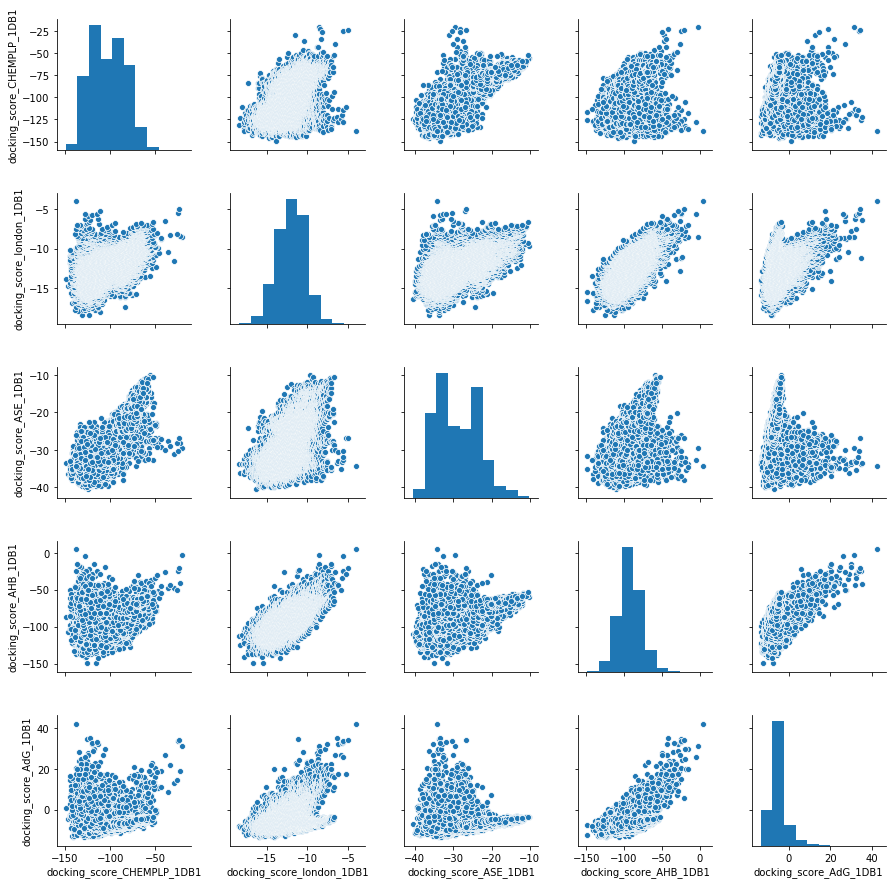

In [19]:
plot = sns.pairplot(df[col_1DB1])
plot.savefig(path+"expl_ds_results/corr_1DB1.png")

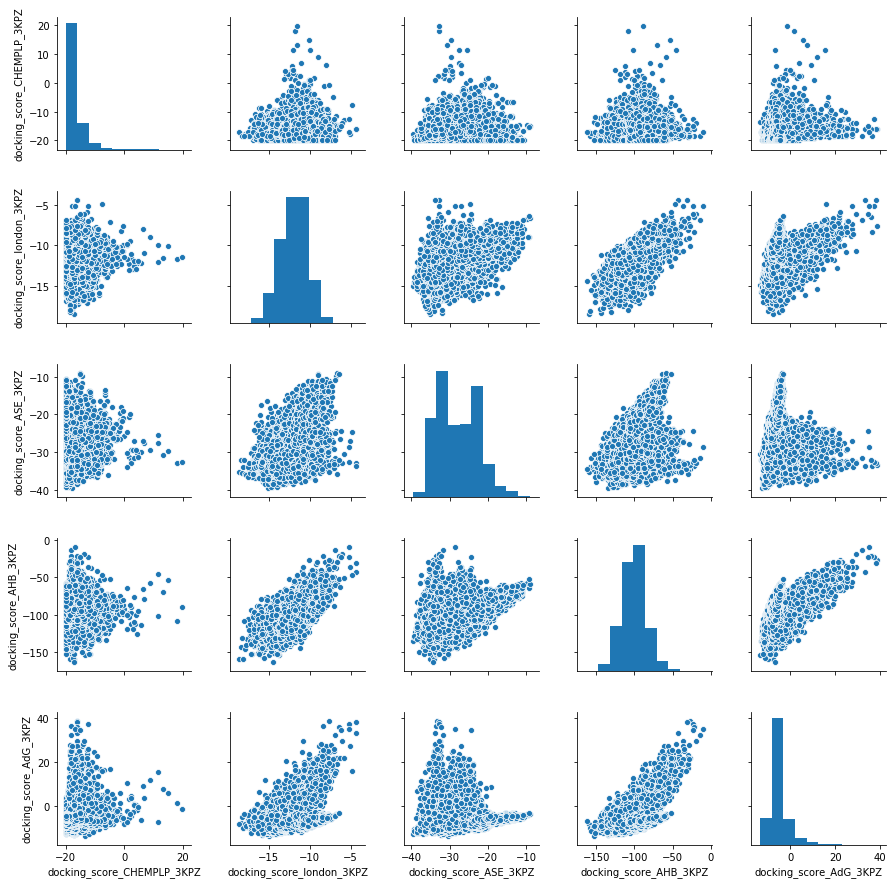

In [15]:
plot = sns.pairplot(df[col_3KPZ])
plot.savefig(path+"expl_ds_results/corr_3KPZ.png")

In [41]:
names_ds = [n for n in names if 'rank' not in n]
names_ds = ['id', 'smi', 'label'] + names_ds

In [42]:
df = df[names_ds]

In [26]:
pca = PCA(2)
transformed = pca.fit_transform(df.iloc[:, 3:])
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(df.iloc[:, 3:])

KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

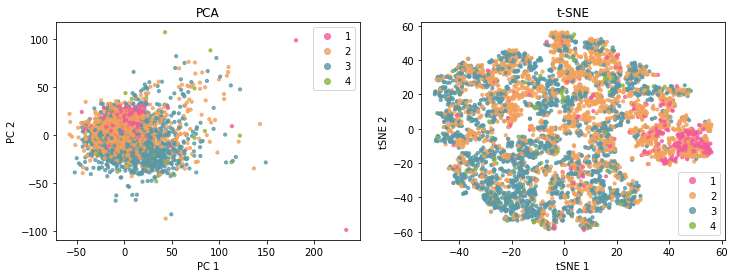

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1], 
                      c=df['cat_1P8D'],cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()
labels = ['1', '2', '3', '4']
plt.legend(handles, labels, title='')

plt.subplot(122)
plt.title('t-SNE')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1], 
                    c=df['cat_1P8D'], cmap=matplotlib.colors.ListedColormap(colors),
                    s=10, alpha=0.8)
handles, labels = scatter.legend_elements()
labels = ['1', '2', '3', '4']
plt.legend(handles, labels, title='')

plt.savefig(path+"expl_ds_results/tsne_ds_cats.png")
plt.show

In [43]:
mols = [Chem.MolFromSmiles(mol) for mol in list(df['smi'])]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]
len(fps)

17540

In [44]:
svd = TruncatedSVD(500) #90 % of variance covered by 500 components
transformed = svd.fit_transform(fps)
print(svd.explained_variance_ratio_.sum())

0.887370877248836


In [45]:
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)

<function matplotlib.pyplot.show(*args, **kw)>

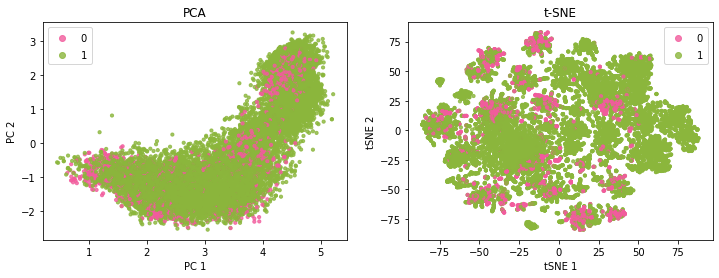

In [93]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=df['active'], cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()

#labels = ['ML', 'actives', 'decoys']
plt.legend(handles, labels, title='')

plt.subplot(122)
plt.title('t-SNE')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1], 
                    c=df['active'], cmap=matplotlib.colors.ListedColormap(colors),
                    s=10, alpha=0.8)
handles, labels = scatter.legend_elements()

#labels = ['ML', 'actives', 'decoys']
plt.legend(handles, labels, title='')

plt.savefig(path+"expl_ds_results/pca_tsne_docking.png")
plt.show

# Categories from the BINS

In [56]:
names_ds = names_ds[3:]

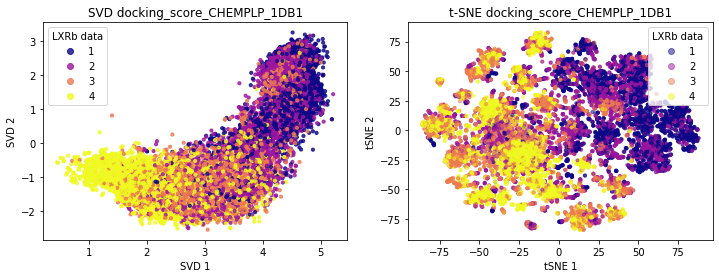

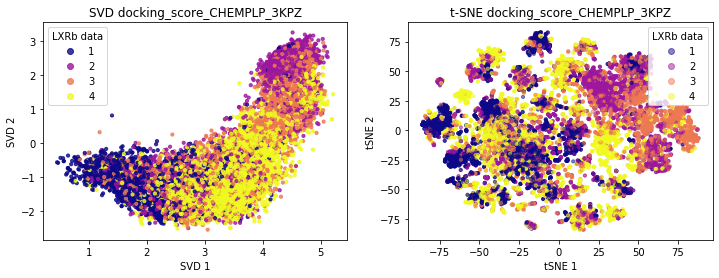

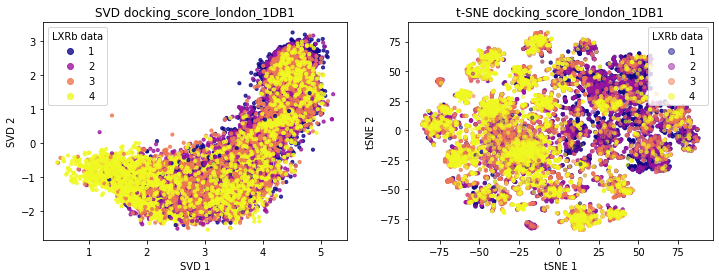

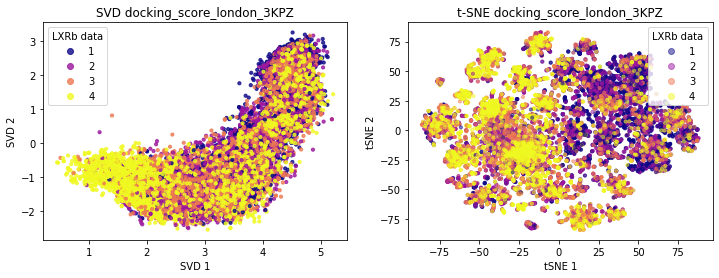

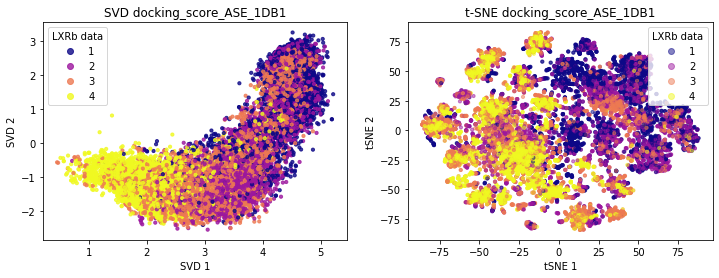

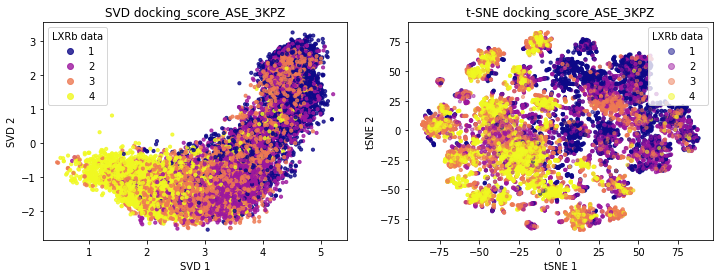

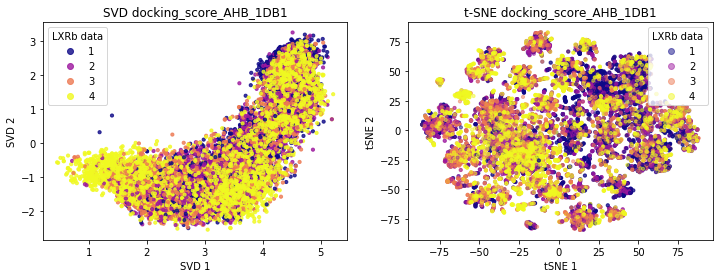

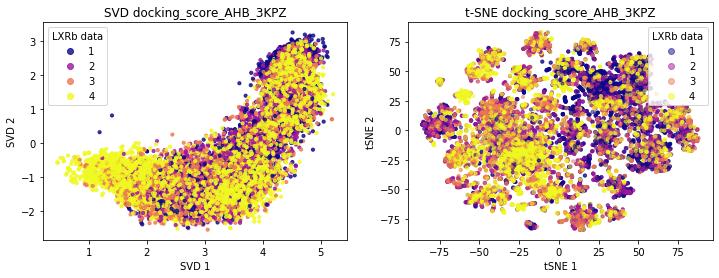

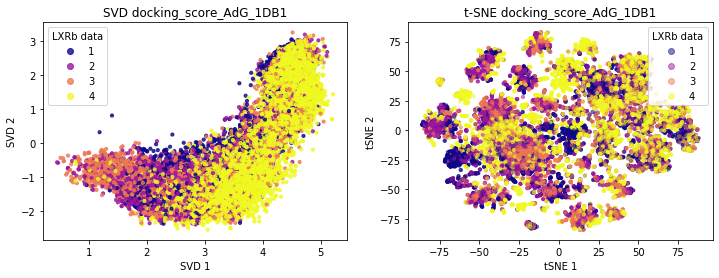

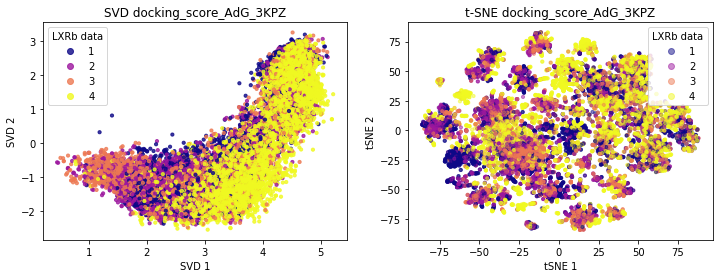

In [58]:
for name in names_ds:

    cats = pd.qcut(df[name], 4, labels=[1, 2, 3, 4])

    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.title('SVD ' + name)
    plt.xlabel('SVD 1')
    plt.ylabel('SVD 2')
    scatter = plt.scatter(transformed[:,0], 
                          transformed[:,1],
                          c=cats,
                          cmap='plasma',
                          s=10, alpha=0.8) #, cmap='bwr'
    handles, labels = scatter.legend_elements()
    labels = range(1, 5)
    plt.legend(handles, labels, title='LXRb data')

    plt.subplot(122)
    plt.title('t-SNE ' + name)
    plt.xlabel('tSNE 1')
    plt.ylabel('tSNE 2')
    scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1],
                        c=cats,
                        cmap='plasma',
                        s=10, alpha=0.5)

    handles, labels = scatter.legend_elements()
    labels = range(1, 8)
    plt.legend(handles, labels, title='LXRb data')


    plt.savefig(path+name+".png", format="png") 
    plt.show()

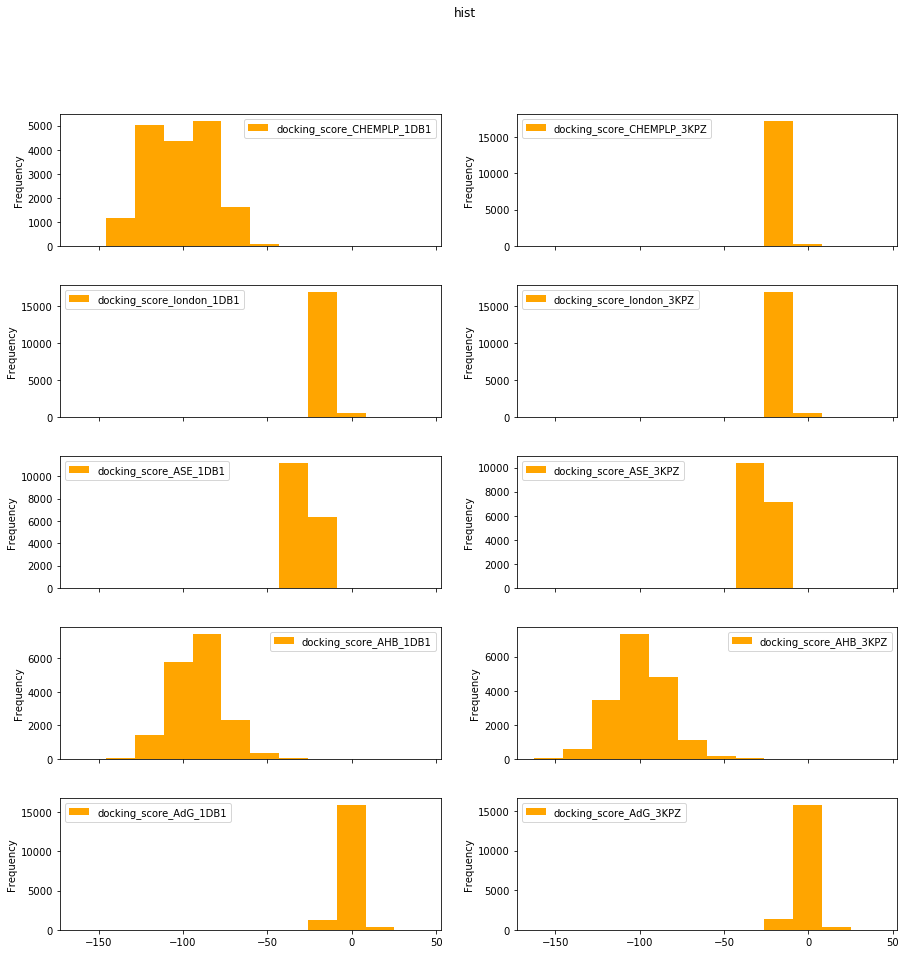

In [73]:
ax=df[names_ds].plot(kind='hist',subplots=True,title='hist',color='orange',grid=False,layout=(5,2),
                    figsize=(15,15), bins=12)
plt.subplots_adjust(hspace=0.3)

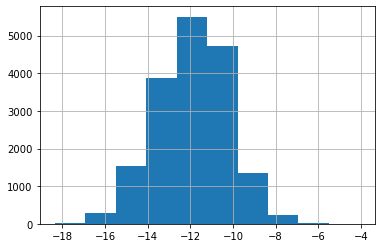

In [62]:
df[names_ds[2]].hist()

In [16]:
df['cat_1P8D'] = pd.cut(x=df['docking_score_ASE_1P8D']*-1, bins=[10, 25, 30 , 35, 45], 
                        labels=range(1,5))
df['cat_1PQ6'] = pd.cut(x=df['docking_score_ASE_1PQ6']*-1, bins=[10, 25, 30 , 35, 45], 
                        labels=range(1,5))

In [408]:
df_2.to_pickle(path+'cat_log_data.pckl')

In [409]:
decoys = df_2[df_2.label==True]
actives = df_2[df_2.label==False]
decoys.shape, actives.shape

((132, 10), (4387, 10))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


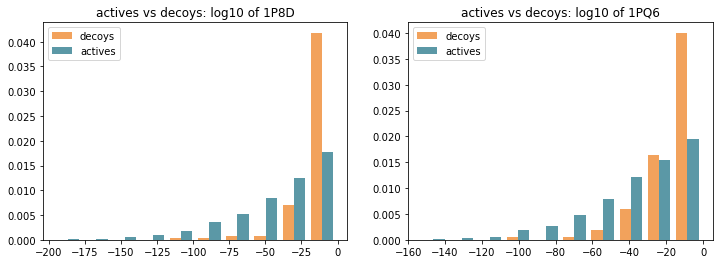

In [410]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])

plt.subplot(122)
plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])

plt.savefig("f:/_phd/Docking_score/LXrb/hist_log10_1Pboth.svg", format="svg") 

In [132]:
#SAVE
file_out = path + 'log10_Data.pckl'
df.to_pickle(file_out)

# DATA in cathegory 1 of the log10 ECR_1P8D 

In [417]:
cat_1_1P8D = df_2[df_2.cat_1P8D==1]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==1]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


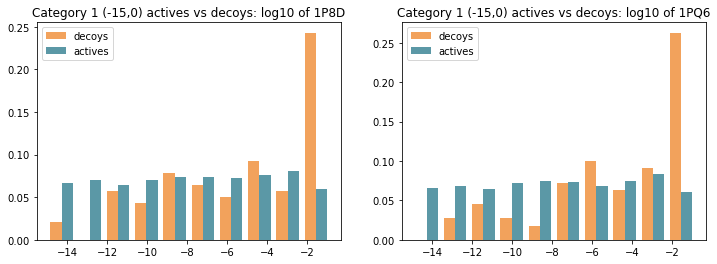

In [418]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 1 (-15,0) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 1 (-15,0) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_1_log10_both.svg", format="svg") 

In [419]:
cat_1_1P8D = df_2[df_2.cat_1P8D==2]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==2]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


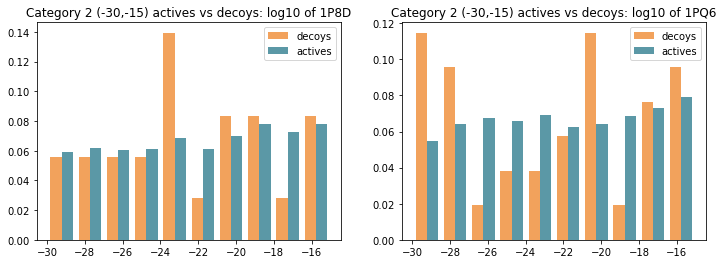

In [420]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 2 (-30,-15) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 2 (-30,-15) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_2_log10_both.svg", format="svg") 

In [421]:
cat_1_1P8D = df_2[df_2.cat_1P8D==3]
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==3]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


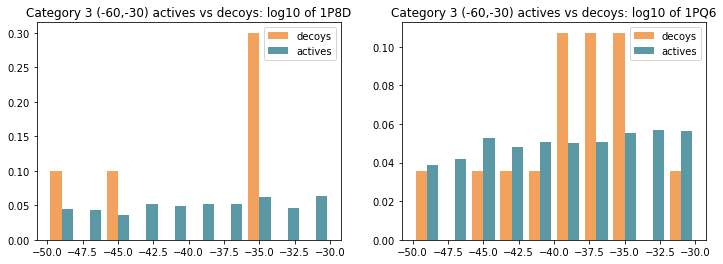

In [422]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
decoys = cat_1_1P8D[cat_1_1P8D.label==True]
actives = cat_1_1P8D[cat_1_1P8D.label==False]
plt.hist([decoys.log10_1P8D, actives.log10_1P8D], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 3 (-60,-30) actives vs decoys: log10 of 1P8D')
plt.legend(['decoys', 'actives'])


plt.subplot(122)
decoys = cat_1_1PQ6[cat_1_1PQ6.label==True]
actives = cat_1_1PQ6[cat_1_1PQ6.label==False]

plt.hist([decoys.log10_1PQ6, actives.log10_1PQ6], 10, density=True, histtype='bar', color=colors)
plt.legend(prop={'size': 10})
plt.title('Category 3 (-60,-30) actives vs decoys: log10 of 1PQ6')
plt.legend(['decoys', 'actives'])


plt.savefig("f:/_phd/Docking_score/LXrb/hist_cat_3_log10_both.svg", format="svg") 

# BINS correlations

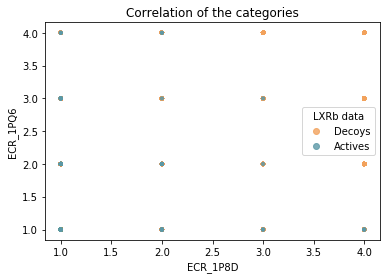

In [423]:
plt.title('Correlation of the categories')
plt.xlabel('ECR_1P8D')
plt.ylabel('ECR_1PQ6')
plt.scatter(df_2.cat_1P8D, df_2.cat_1PQ6, c=df_2.label,cmap=matplotlib.colors.ListedColormap(colors),
            s=10, alpha=0.8)

labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.savefig("f:/_phd/Docking_score/LXrb/corr_categories_ECRs.svg", format="svg") 

In [427]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(df_2.fps.tolist())
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)
print(svd.explained_variance_ratio_.sum())

0.9130597405064937


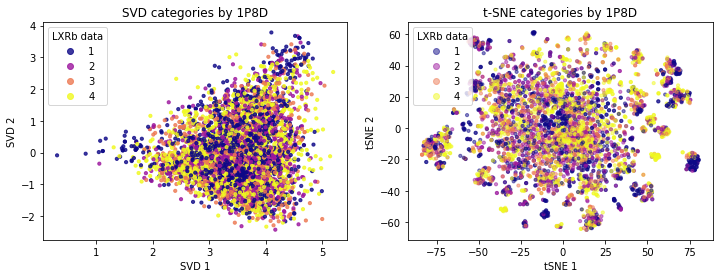

In [428]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD categories by 1P8D')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], 
                      transformed[:,1],
                      c=df_2.cat_1P8D,
                      cmap='plasma',
                      s=10, alpha=0.8) #, cmap='bwr'
handles, labels = scatter.legend_elements()
labels = range(1, 5)
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE categories by 1P8D')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter=plt.scatter(X_embedded[:,0], X_embedded[:,1],
                    c=df_2.cat_1P8D,
                      cmap='plasma',
                      s=10, alpha=0.5)
                    
handles, labels = scatter.legend_elements()
labels = range(1, 8)
plt.legend(handles, labels, title='LXRb data')


plt.savefig("f:/_phd/Docking_score/LXrb/grouping_by_cat_1P8D.svg", format="svg") 

# justcategory 1

In [429]:
cat_1_1P8D = df_2[df_2.cat_1P8D==1]
mols_cat_1 = [Chem.MolFromSmiles(mol) for mol in list(cat_1_1P8D['smiles'])]
fps_cat_1 = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols_cat_1]

In [430]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(fps_cat_1)
print(svd.explained_variance_ratio_.sum())

0.9611184426457118


In [431]:
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)

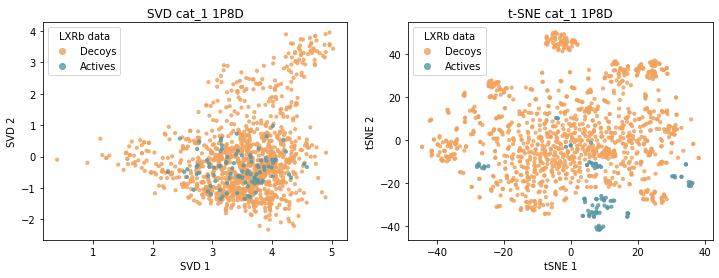

In [432]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD cat_1 1P8D')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=cat_1_1P8D.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE cat_1 1P8D')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1],
                      c=cat_1_1P8D.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')



plt.savefig("f:/_phd/Docking_score/LXrb/SVD_tSNE_cat_1_1P8D.svg", format="svg") 

In [446]:
cat_1_1PQ6 = df_2[df_2.cat_1PQ6==1]
mols_cat_1 = [Chem.MolFromSmiles(mol) for mol in list(cat_1_1PQ6['smiles'])]
fps_cat_1 = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols_cat_1]
cat_1_1PQ6.shape

(1297, 10)

In [447]:
svd = TruncatedSVD(500) #85% of variance covered by 500 components
transformed = svd.fit_transform(fps_cat_1)
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(transformed)
print(svd.explained_variance_ratio_.sum(), X_embedded.shape)

0.9598677648342975 (1297, 2)


In [448]:
cat_1_1PQ6.label.shape

(1297,)

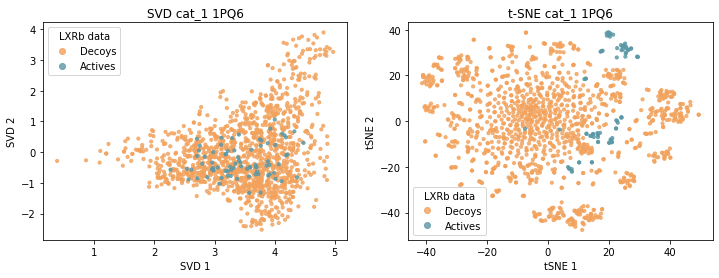

In [449]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('SVD cat_1 1PQ6')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
scatter = plt.scatter(transformed[:,0], transformed[:,1],
                      c=cat_1_1PQ6.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')

plt.subplot(122)
plt.title('t-SNE cat_1 1PQ6')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1],
                      c=cat_1_1PQ6.label,
                      cmap=matplotlib.colors.ListedColormap(colors),
                      s=10, alpha=0.8) #, cmap='bwr'

handles, labels = scatter.legend_elements()
labels = ['Decoys', 'Actives']
plt.legend(handles, labels, title='LXRb data')



plt.savefig("f:/_phd/Docking_score/LXrb/SVD_tSNE_cat_1_1PQ6.svg", format="svg") 

# similiarity in Four categories

In [264]:
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [373]:
mols = [Chem.MolFromSmiles(mol) for mol in list(df_2['smiles'])]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [374]:
df_2['fps'] = fps
df_2.head()

id                                             smiles  \
2941  C00057978               Brc1ccc(cc1)C1=Cc2c(OC1=O)cc(OCC)cc2   
681   C00631561  Brc1cc(ccc1)\C=C\1/SC=2N([C@@H](C(C(OCC)=O)=C(...   
1778  C00639187    Brc1ccc(S(=O)(=O)n2nc(C)c(Sc3ccc(Cl)cc3)c2C)cc1   
3387  C00640101               Brc1sc(S(=O)(=O)NCc2ccc(Cl)cc2Cl)cc1   
1079  C00640835  Clc1cc(\C=C/2\C(=O)N(NC\2=O)c2ccccc2)c(OCc2ccc...   

          ECR_1P8D      ECR_1PQ6  log10_1PQ6  log10_1P8D  label cat_1P8D  \
2941  2.398798e-30  1.149808e-55  -54.939375  -29.620006  False        2   
681   2.405007e-31  1.624675e-34  -33.789233  -30.618884  False        3   
1778  2.455262e-39  1.432552e-24  -23.843890  -38.609902  False        3   
3387  6.149244e-46  3.681807e-41  -40.433939  -45.211178  False        3   
1079  3.297166e-37  1.865009e-10   -9.729319  -36.481859  False        3   

     cat_1PQ6                                                fps  
2941        4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
681         3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
1778        2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3387        3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1079        1  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [383]:
mols_list_1P8D = []

for i in range(1,5):
    mols_list_1P8D.append([Chem.MolFromSmiles(m) for m in df_2[df_2.cat_1P8D==i].smiles])

In [384]:
mols_list_1PQ6 = []

for i in range(1,5):
    mols_list_1PQ6.append([Chem.MolFromSmiles(m) for m in df_2[df_2.cat_1PQ6==i].smiles])

In [386]:
for i in range(1,5):
    ole = df_2[df_2.cat_1P8D==i]
    ore = df_2[df_2.cat_1PQ6==i]
    print(ole.shape, ore.shape)

(1236, 10) (1297, 10)
(980, 10) (1086, 10)
(923, 10) (1027, 10)
(1380, 10) (1109, 10)


# PICTURES of the structures in cats

In [387]:
for i in range(4): 
    img = Draw.MolsToGridImage(mols_list_1P8D[i][:8],molsPerRow=4,subImgSize=(200,200))
    img.save(path+'struct_1P8D_cat_'+str(i)+'.png')

In [388]:
for i in range(4): 
    img = Draw.MolsToGridImage(mols_list_1PQ6[i][:8],molsPerRow=4,subImgSize=(200,200))
    img.save(path+'struct_1PQ6_cat_'+str(i)+'.png')

In [391]:
smi_by_cat =[]
for i in range(1,5):
    ole = df_2[df_2.cat_1P8D==i]
    smi_by_cat.append(ole.smiles)

In [397]:
picker = MaxMinPicker()
selected_fps_per_cat = []


for k in range(4):
    mols = [Chem.MolFromSmiles(mol) for mol in smi_by_cat[k]]
    fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]
    nfps = len(fps)
    def distij(i,j,fps=fps):
        return 1-DataStructs.DiceSimilarity(fps[i],fps[j])

    pickIndices = picker.LazyPick(distij, nfps, 900, seed=0)    
    picks = [fps[x] for x in pickIndices]
    selected_fps_per_cat.append(picks)

# Calculate Similarity

In [400]:
dist = []
for q in range(2):
    for k in range(1,4):
        a = 0
        b = 0
        for i in range(20):
            for j in range(20):
                b+=1
                a+=DataStructs.FingerprintSimilarity(selected_fps_per_cat[q][i],selected_fps_per_cat[k][j], 
                                                     metric=DataStructs.DiceSimilarity)

        dist.append(a/b)

dist

[0.15091081504404394,
 0.14557759147638727,
 0.14790682911397746,
 0.18717674746021337,
 0.15872829916534598,
 0.1621639240393007]

In [306]:
DataStructs.FingerprintSimilarity(selected_fps_per_cat[0][0],selected_fps_per_cat[0][0], metric=DataStructs.DiceSimilarity)

1.0